In [1]:
#importación librerias necesarias para hacer los procesos.
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#declarando variable con el archivo csv del dataset.
dataset = "Housing.csv"

In [3]:
#leemos el dataset y lo guardamos en una nueva variable.
ds = pd.read_csv(dataset)

In [4]:
#vemos las primeras filas de el dataset.
ds.head()

,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,7229300521,20141013,231300.0,2,1.00,1180,5650,1.0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#revisamos si hay datos nulos en las primeras 5 filas.
missing_data = ds.isnull()
missing_data.head(5)

,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
#revisamos si alguna columna tiene valores nulos.
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Unnamed: 0.1
Unnamed: 0.1
False    21613
Name: count, dtype: int64

Unnamed: 0
Unnamed: 0
False    21613
Name: count, dtype: int64

id
id
False    21613
Name: count, dtype: int64

date
date
False    21613
Name: count, dtype: int64

price
price
False    21613
Name: count, dtype: int64

bedrooms
bedrooms
False    21613
Name: count, dtype: int64

bathrooms
bathrooms
False    21613
Name: count, dtype: int64

sqft_living
sqft_living
False    21613
Name: count, dtype: int64

sqft_lot
sqft_lot
False    21613
Name: count, dtype: int64

floors
floors
False    21613
Name: count, dtype: int64

waterfront
waterfront
False    21613
Name: count, dtype: int64

view
view
False    21613
Name: count, dtype: int64

condition
condition
False    21613
Name: count, dtype: int64

grade
grade
False    21613
Name: count, dtype: int64

sqft_above
sqft_above
False    21613
Name: count, dtype: int64

sqft_basement
sqft_basement
False    21613
Name: count, dtype: int64

yr_built
yr_built
False    21613
Name: count

In [7]:
#Mostramos los tipos de datos de cada columna de el dataset.
ds.dtypes

Unnamed: 0.1       int64
Unnamed: 0         int64
id                 int64
date               int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
#Hacemos la correlación de las columnas price, sqft_lot y yr_built.
ds[['price', 'sqft_lot', 'yr_built']].corr()

,price,sqft_lot,yr_built
price,1.000000,0.089661,0.054011
sqft_lot,0.089661,1.000000,0.053080
yr_built,0.054011,0.053080,1.000000


In [9]:
#Mostramos las estadisticas de cada columna del dataset.
ds.describe()

,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,2.161300e+04,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,10806.00000,4.580306e+09,2.014390e+07,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,6239.28002,2.876570e+09,4.436582e+03,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,0.00000,1.000102e+06,2.014050e+07,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,5403.00000,2.123049e+09,2.014072e+07,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,10806.00000,3.904930e+09,2.014102e+07,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,16209.00000,7.308900e+09,2.015022e+07,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,21612.00000,9.900000e+09,2.015053e+07,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
#hacemos un conteo de cuantas viviendas fueron construidas en cada año.
ds['yr_built'].value_counts().to_frame()

,count
yr_built,
2014,559
2006,454
2005,450
2004,433
2003,422
...,...
1933,30
1901,29
1902,27


In [11]:
#Muestra la cantidad total de casas que estan o no frente al mar.
waterfront_counts = ds['waterfront'].value_counts().to_frame()
waterfront_counts.rename(columns={'waterfront': 'value_counts'}, inplace=True)
waterfront_counts.index.name = 'waterfront'
waterfront_counts.head(10)

,count
waterfront,
0,21450
1,163


In [12]:
#Aqui vemos las categorias de datos que hay en waterfront.
ds['waterfront'].unique()

array([0, 1], dtype=int64)

In [13]:
#declaramos variables con diferentes columnas del dataset.
ds_group_one = ds[['bedrooms','price']]
ds_group_two = ds[['bathrooms', 'price']]
ds_group_three = ds[['grade', 'price']]

In [14]:
#agrupamos todos los datos por bedrooms y sacamos la media del precio para cada cantidad de habitaciones.
ds_group_one.groupby(['bedrooms'],as_index=False).mean()
ds_group_one

,bedrooms,price
0,2,231300.0
1,3,538000.0
2,2,180000.0
3,4,604000.0
4,3,510000.0
...,...,...
21608,3,360000.0
21609,4,400000.0
21610,2,402101.0
21611,3,400000.0


In [15]:
#agrupamos todos los datos por bathrooms y sacamos la media del precio para cada cantidad de baños.
ds_group_two.groupby(['bathrooms'],as_index=False).mean()
ds_group_two

,bathrooms,price
0,1.00,231300.0
1,2.25,538000.0
2,1.00,180000.0
3,3.00,604000.0
4,2.00,510000.0
...,...,...
21608,2.50,360000.0
21609,2.50,400000.0
21610,0.75,402101.0
21611,2.50,400000.0


In [16]:
#agrupamos todos los datos por grade y sacamos la media del precio por cada cantidad de estrellas en la calificación.
ds_group_three.groupby(['grade'],as_index=False).mean()
ds_group_three

,grade,price
0,7,231300.0
1,7,538000.0
2,6,180000.0
3,7,604000.0
4,8,510000.0
...,...,...
21608,8,360000.0
21609,8,400000.0
21610,7,402101.0
21611,8,400000.0


In [17]:
#guardamos la función de regresión lineal en una variable.
lm = LinearRegression()
lm

LinearRegression()

In [18]:
#Guradamo las columnas price y floors en 2 variables (x, y)
X = ds[['floors']]
Y = ds[['price']]

In [19]:
#utilizamos la función fit para adaptar las variables x, y en una regresión lineal.
lm.fit(X,Y)

LinearRegression()

In [20]:
#Realizamos una predicción de X.
Yhat=lm.predict(X)
Yhat[0:5] 

array([[453788.12316855],
       [628376.19842087],
       [453788.12316855],
       [453788.12316855],
       [453788.12316855]])

In [21]:
#sacamos el intercepto de la regresión lineal.
lm.intercept_

array([279200.04791623])

In [22]:
#Sacamos el coeficiente de la regresión lineal.
lm.coef_

array([[174588.07525232]])

In [23]:
#Guardamos otras columnas que pueden servir para hacer predicciones dentro de la variable Z.
Z = ds[['bedrooms', 'bathrooms', 'waterfront']]

In [24]:
#Adaptamos la variable Z a una regresión lineal junto con la columna price.
lm.fit(Z, ds['price'])

LinearRegression()

In [25]:
#Sacamos el intercepto de la regresión lineal.
lm.intercept_

-33317.76880108751

In [26]:
#Sacamos el coeficiente de la regresión lineal.
lm.coef_

array([  25157.86073037,  227468.10084143, 1003017.38174447])

(0.0, 8084085.692072892)

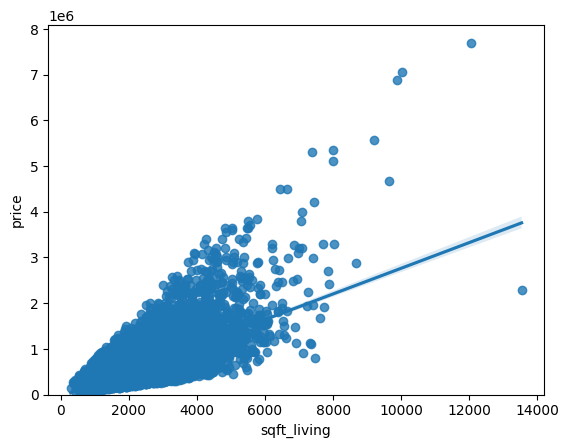

In [27]:
#Graficamos en un diagrama de dispersión los datos de price respecto a sqft_living.
sns.regplot(x="sqft_living", y="price", data=ds)
plt.ylim(0,)

In [28]:
#Se hace la correlación de las columnas sqft_living y price.
ds[["sqft_living", "price"]].corr()

,sqft_living,price
sqft_living,1.000000,0.702035
price,0.702035,1.000000


<Axes: xlabel='condition', ylabel='sqft_lot'>

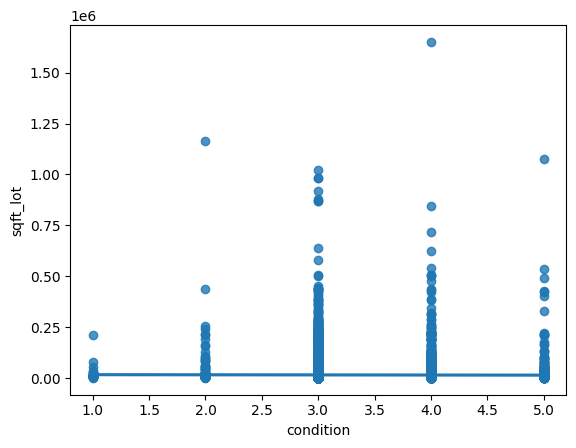

In [29]:
#Graficamos con un diagrama de dispersión los datos de condition respecto a sqft_lot.
sns.regplot(x="condition", y="sqft_lot", data=ds)

<Axes: xlabel='bedrooms', ylabel='price'>

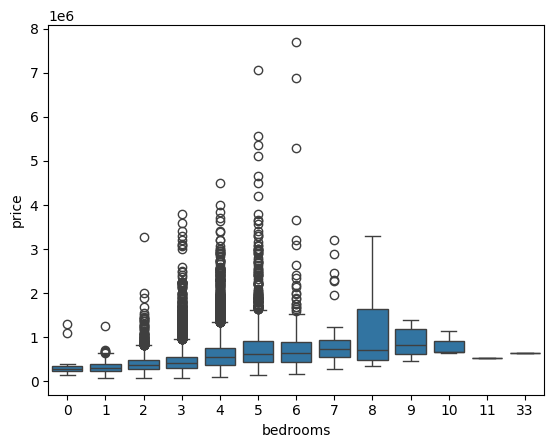

In [30]:
#graficamos un diagrama de cajas con los datos de bedrooms respecto a price.
sns.boxplot(x="bedrooms", y="price", data=ds)

In [31]:
#hacemos la correlación de condition y sqft_lot.
ds[["condition", "sqft_lot"]].corr()

,condition,sqft_lot
condition,1.000000,-0.008958
sqft_lot,-0.008958,1.000000


Text(0, 0.5, 'Price (in dollars)')

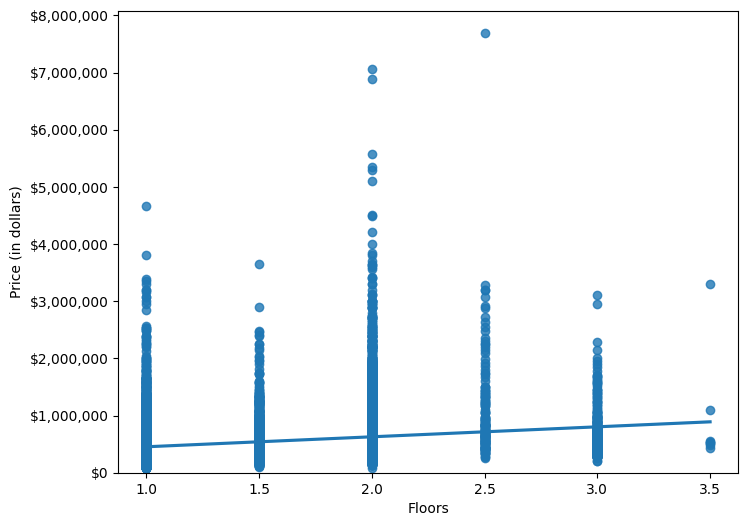

In [32]:
#hacemos un diagrama de dispersión de los datos de price respecto a floors.
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="floors", y="price", data=ds)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "${:,}".format(int(y))))
plt.ylim(0,)
plt.xlabel('Floors')
plt.ylabel('Price (in dollars)')

Text(0, 0.5, 'Price (in dollars)')

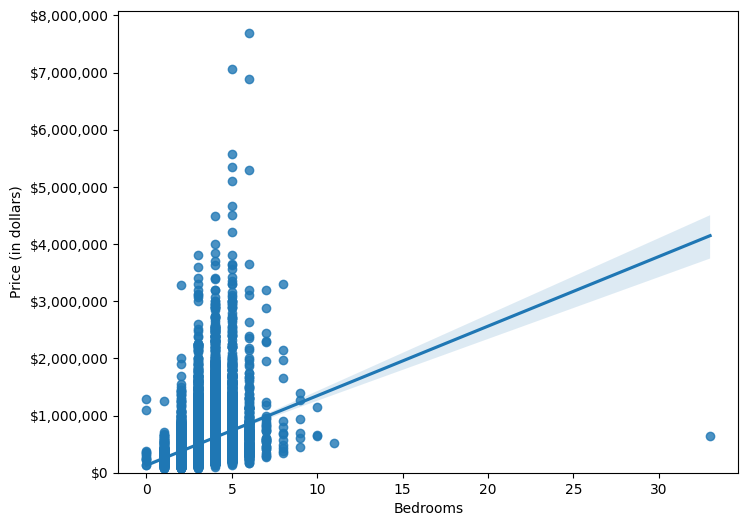

In [33]:
#Hacemos un diagrama de dispersión de los datos de price respecto a bedrooms.
plt.figure(figsize=(width, height))
sns.regplot(x="bedrooms", y="price", data=ds)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "${:,}".format(int(y))))
plt.ylim(0,)
plt.xlabel('Bedrooms')
plt.ylabel('Price (in dollars)')

Text(0, 0.5, 'Price (in dollars)')

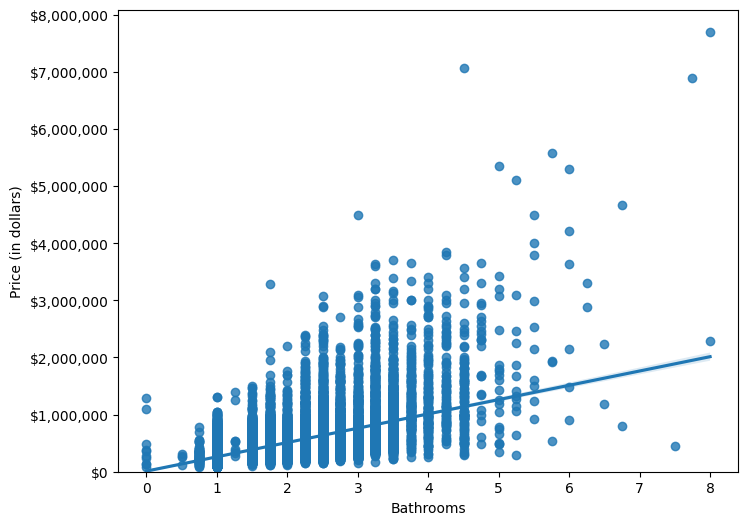

In [34]:
#Hacemos un diagrama de dispersion con los datos de price respecto a bathrooms.
plt.figure(figsize=(width, height))
sns.regplot(x="bathrooms", y="price", data=ds)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "${:,}".format(int(y))))
plt.ylim(0,)
plt.xlabel('Bathrooms')
plt.ylabel('Price (in dollars)')

Text(0, 0.5, 'Price (in dollars)')

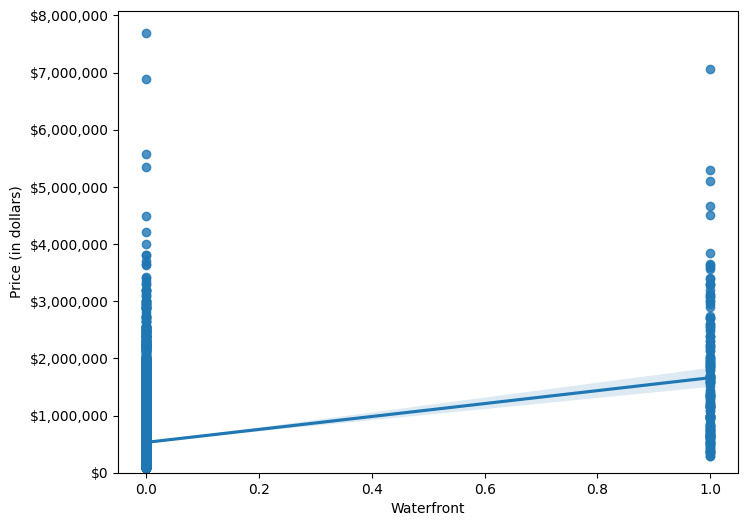

In [35]:
#Hacemos un diagrama de dispersion de los datos de price respecto a waterfront.
plt.figure(figsize=(width, height))
sns.regplot(x="waterfront", y="price", data=ds)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "${:,}".format(int(y))))
plt.ylim(0,)
plt.xlabel('Waterfront')
plt.ylabel('Price (in dollars)')

In [36]:
#Hacemos una predicción de Z y lo guardamos en una variable.
Y_hat = lm.predict(Z)

In [37]:
#obtenemos los datos numericos de el dataset
ds._get_numeric_data()
ds.head()

,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,7229300521,20141013,231300.0,2,1.00,1180,5650,1.0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
